In [9]:
# 문제 5 
# date out 컬럼을 Duration과 date in 시간으로 계산

import pandas as pd
import datetime
df =pd.read_csv('bike_usage_0.csv', encoding='CP949', parse_dates=['Date_in','Time_out'])
df['Date_in'] = df['Date_in'].str.replace('오전', 'AM').str.replace('오후', 'PM')
df['Date_in'] = pd.to_datetime(df['Date_in'], format='%Y-%m-%d %p %I:%M:%S', errors='coerce')
df['Time_out'] = df['Date_in']-df['Duration'].apply(pd.offsets.Minute)
df.head()

C:\Users\qq\AppData\Local\Temp\ipykernel_13912\339188401.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv('bike_usage_0.csv', encoding='CP949', parse_dates=['Date_in','Time_out'])
C:\Users\qq\AppData\Local\Temp\ipykernel_13912\339188401.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv('bike_usage_0.csv', encoding='CP949', parse_dates=['Date_in','Time_out'])
C:\Users\qq\AppData\Local\Temp\ipykernel_13912\339188401.py:6: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df['Time_out'] = df['Date_in']-df['Duration'].apply(pd.offsets.Minute)


,Date_out,Time_out,Station_no_out,Station_out,Membership_type,Gender,Age_Group,Momentum,Station_no_in,Station_in,Date_in,Bike_no,Carbon_amount,Distance,Duration
0,2019-10-03,2019-10-03 00:15:42,129,129. 신촌역(2호선) 6번출구 옆,정기권,NaN,~10대,28.27,122,신성기사식당 앞,2019-10-03 00:20:42,SPB-15000,0.24,1050,5
1,2019-10-03,2019-10-03 00:44:32,150,150. 서강대역 2번출구 앞,정기권,NaN,20대,146.46,2065,서울시여성가족재단,2019-10-03 01:16:32,SPB-13087,1.32,5690,32
2,2019-10-03,2019-10-03 00:08:21,240,240. 문래역 4번출구 앞,정기권,NaN,20대,37.13,245,삼성생명 당산사옥 앞,2019-10-03 00:18:21,SPB-23229,0.29,1250,10
3,2019-10-03,2019-10-03 00:51:39,623,623. 서울시립대 정문 앞,정기권,NaN,20대,134.62,1346,길음8골어린이공원 옆,2019-10-03 01:15:39,SPB-14181,1.21,5230,24
4,2019-10-03,2019-10-03 00:06:58,633,633. 청량리 기업은행 앞,정기권,NaN,20대,85.83,568,청계8가사거리 부근,2019-10-03 00:17:58,SPB-15221,0.67,2890,11


나이대별/정기-일일권 사용자의 총이동거리량 비교

Text(0.5, 1.0, '일일권')

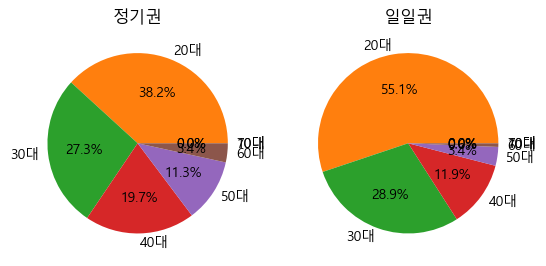

In [1]:
import pandas as pd
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
import matplotlib.pyplot as plt

df =pd.read_csv('bike_usage_0.csv', encoding='CP949')
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
aa1 = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=aa1, ordered=True)
df_jung=df['Membership_type']=='정기권'
df1=df[df_jung]
df_il=df['Membership_type']=='일일권'
df2=df[df_il]
fig, ax = plt.subplots(nrows=1,ncols=2)

ax[0].pie(df1['Age_Group'].value_counts(sort=False), labels=aa1, autopct="%1.1f%%")
ax[1].pie(df2['Age_Group'].value_counts(sort=False), labels=aa1, autopct="%1.1f%%")
ax[0].set_title('정기권')
ax[1].set_title('일일권')

출발이용객과 도착이용객의 차이를 지도에 원크기로 표기

In [2]:
import folium
import pandas as pd

# 데이터 로드
df_usage = pd.read_csv('bike_usage_0.csv', encoding='CP949')
df_stations = pd.read_csv('stations.csv', encoding='utf-8')

# 피벗 테이블 생성
df2 = df_usage.pivot_table(index='Station_no_out', values='Station_out', aggfunc='count')
df3 = df_usage.pivot_table(index='Station_no_in', values='Station_in', aggfunc='count')

# 스테이션 ID의 유니온 생성
a = set(df2.index.values)
b = set(df3.index.values)
c = a | b
new_ind = map(int, c)

# 새로운 데이터프레임 생성
df5 = pd.DataFrame()
df5['Station_id'] = pd.Series(new_ind).astype(int)

# 'Station_out' 및 'Station_in' 열 추가, 결측값은 0으로 채움
df5['Station_out'] = df5['Station_id'].map(df2['Station_out']).fillna(0).astype(int)
df5['Station_in'] = df5['Station_id'].map(df3['Station_in']).fillna(0).astype(int)

# 차이 계산
df5['Diff'] = (df5['Station_in'] - df5['Station_out']).astype(int)

# 스테이션 좌표와 병합
df_stations['ID'] = df_stations['ID'].astype(int)
df5 = df5.merge(df_stations[['ID', 'Latitude', 'Longitude']], left_on='Station_id', right_on='ID', how='left')
df5.drop(columns=['ID'], inplace=True)

# NaN 값을 포함하지 않는 데이터만 사용
df5 = df5.dropna(subset=['Latitude', 'Longitude'])

# 지도 생성
m = folium.Map(width=600, height=400, location=[df5['Latitude'].mean(), df5['Longitude'].mean()], zoom_start=12)

# 모든 스테이션을 지도에 추가
for i in df5.index:
    diff = int(df5.loc[i, 'Diff'])  # diff를 int로 변환
    if diff < 0:
        color = 'red'
    else:
        color = 'blue'
    
    radius = abs(diff) * 10  # 절댓값 크기에 비례하여 원의 크기 조정

    folium.Circle(
        location=[df5.loc[i, 'Latitude'], df5.loc[i, 'Longitude']],
        tooltip=f"Station ID: {df5.loc[i, 'Station_id']}, Out: {df5.loc[i, 'Station_out']}, In: {df5.loc[i, 'Station_in']}, Diff: {diff}",
        radius=radius,  # 원의 크기
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# 지도 표시
m

In [8]:
import folium
import requests
import numpy as np

BIKEdata = pd.read_csv('bike_usage_0.csv', encoding='CP949')
STATIONdata = pd.read_csv('stations.csv')
WEATHERdata = pd.read_csv('weather.csv')

start = input()
end = input()
request = requests.get(f'https://www.google.co.kr/maps/dir/{start}/{end}')
result= request.text.split("markers=")[1].split("&amp")[0].split("%7C")
print(result)
startxy=list(map(float,[result[0].split("%2C")[0],result[0].split("%2C")[1]]))
endxy=list(map(float,[result[1].split("%2C")[0],result[1].split("%2C")[1]]))
print(startxy,endxy)
startpoint = np.array(startxy)
endpoint = np.array(endxy)
dataxy=STATIONdata.loc[:,['Latitude','Longitude']].values
resultstartxy = (abs(dataxy-startpoint))
#print(resultstartxy)
STATIONdata['distancestart'] = (resultstartxy[:,0]**2+resultstartxy[:,1]**2)**(1/2)
nearstart = STATIONdata['distancestart'].idxmin()
nearstart2 = STATIONdata[['Latitude','Longitude']].iloc[nearstart].to_list()
resultendxy = (abs(dataxy-endpoint))
STATIONdata['distanceend'] = (resultendxy[:,0]**2+resultendxy[:,1]**2)**(1/2)
nearend=STATIONdata['distanceend'].idxmin()
nearend2 =STATIONdata[['Latitude','Longitude']].iloc[nearend].to_list()
print('출발지:',STATIONdata.iloc[nearstart],'도착지',STATIONdata.iloc[nearend])
m = folium.Map(width=600, height=400, location= nearstart2, zoom_start=12)
lines =[startxy,nearstart2,nearend2,endxy]
print(type(nearstart2))
print(type(lines))
folium.PolyLine(
    locations = lines,
    tooltip = 'PolyLine'
).add_to(m)
for op in lines:
    print(type(op))
    if op == lines[0]:
    
        h = f'출발지: {start}'
    elif op == lines[1]:
        h = f"가까운 station:{STATIONdata['Station'].iloc[nearstart]}"
    elif op == lines[2]:
        h = f"도착지에서 가까운 station:{STATIONdata['Station'].iloc[nearend]}"
    else:
        h =f'도착지: {end}'
    folium.Marker(
        location = op,
        radius = 10,   
        popup= h,
        icon=folium.Icon(color='red',icon='star')
    


        ).add_to(m)
m

['37.4648267%2C126.9571988', '37.555946%2C126.972317']
[37.4648267, 126.9571988] [37.555946, 126.972317]
출발지: Gu                                서초구
ID                               2223
Station              2223. 방배래미안 정문 앞
Address          서울특별시 서초구 남부순환로 2183
Latitude                     37.47261
Longitude                  126.983009
Date                 2017-06-01 10:23
No_of_Racks                        20
distancestart                0.026958
distanceend                  0.084019
Name: 297, dtype: object 도착지 Gu                               마포구
ID                               157
Station             157. 애오개역 4번출구 앞
Address          서울특별시 마포구 아현동 607-1
Latitude                   37.553001
Longitude                 126.956688
Date                2016-06-29 12:00
No_of_Racks                       12
distancestart               0.088176
distanceend                 0.015904
Name: 39, dtype: object
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list